                                                                    AMITH T UMESH (PGC DSC26 UPGRAD IIIT-B)

# Assignment - Linear Regression Model - Bike Sharing

## Business Goal:

- We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [1]:
# We are supposed to import required python packages to work on the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# let us now import the data set and read it by using pandas 

df = pd.read_csv('G:\\PG CERTIFICATION IN DATA SCIENCE-UPGRAD\\MARCH 2021\\Assignment\\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Analysis

In [3]:
# We shall see the properties of the data set

# shape function

df.shape

(730, 16)

- The data set has 730 rows and 16 columns

In [4]:
# Information of the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- From the above both informations we can say that there are no null values in the data set and most of the data type are numeric data except 'dteday' is an object type

In [6]:
# let us look into the numerical summary of the data set

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


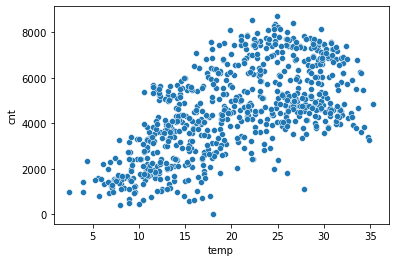

In [7]:
# let us try to visualize relationship between variables with target variable

#scatter plot for 'temp'
sns.scatterplot(x='temp', y='cnt', data = df)
plt.show()

- from the above plot we can say that variable 'temp' has a linear relation with the target variable 'cnt'.

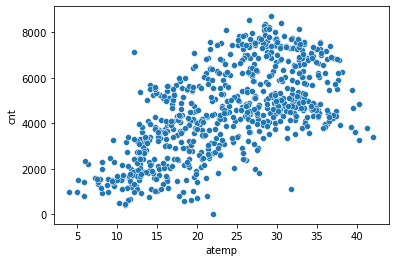

In [8]:
#scatter plot for 'atemp'
sns.scatterplot(x='atemp', y='cnt', data = df)
plt.show()

- 'atemp' is also linearly related with our target variable.

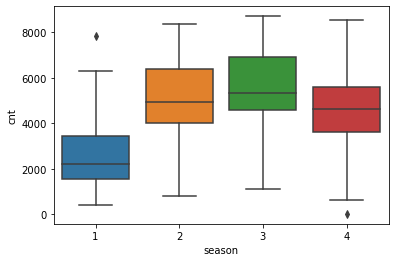

In [9]:
#box plot for 'season'
sns.boxplot(x='season', y='cnt', data = df)
plt.show()

- we can see that spring season has an outlier

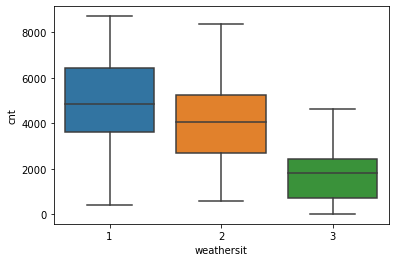

In [10]:
#box plot for 'weathersit'
sns.boxplot(x='weathersit', y='cnt', data = df)
plt.show()

- There are no outliers in weathersit variable

# Data Filtering

- Before getting into deep analysis we might have to drop or ignore unwanted columns/variables in the further analysis

In [11]:
# Let us see the variables are present in the data set

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
# We may decide to drop 'instant' and 'dteday' from the data set which is actually a index number and date respectively 
# and 'casual' and 'registered' as well since 'cnt' variabe is the count of both
# Which we may find it not very useful in our analysis

df_1 = df.drop(columns=['instant','dteday','casual','registered'])

In [13]:
df_1.shape

(730, 12)

- With the above information we are sure that we have dropped 4 columns from the data set from 16 columns to 12 columns and rows remains unchanged.

In [14]:
# We might also require to convert few variables to categorical variable from it's data type
# By checking into the variables we can decide that variables such as 'season','mnth','weekday', and 'weathersit'
# are supposed to be categorical type and we shall convert the data types to same as mentioned now.

cat_var = ['season','mnth','weekday','weathersit']
df_1[cat_var] = df_1[cat_var].astype('category')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


- As per the plan we have converted the mentioned variables data types to categorical variable and same can be seen above

## *For easy interpretation and calculation of the odds ratios in the data set, let us create dummy variable of the independent variable.

### - Before creating dummy variable, let us have a look at the correlation between original variables in the data set

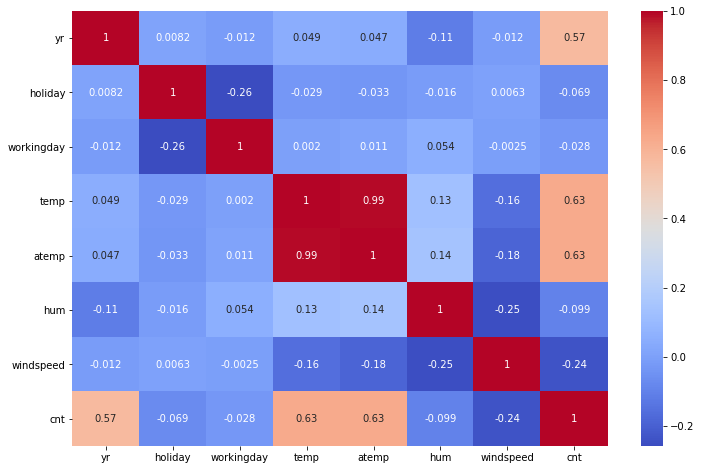

In [15]:
# Heat map to see the correlation between the variables

plt.figure(figsize=[12,8])
sns.heatmap(df_1.corr(), annot=True, cmap='coolwarm')
plt.show()

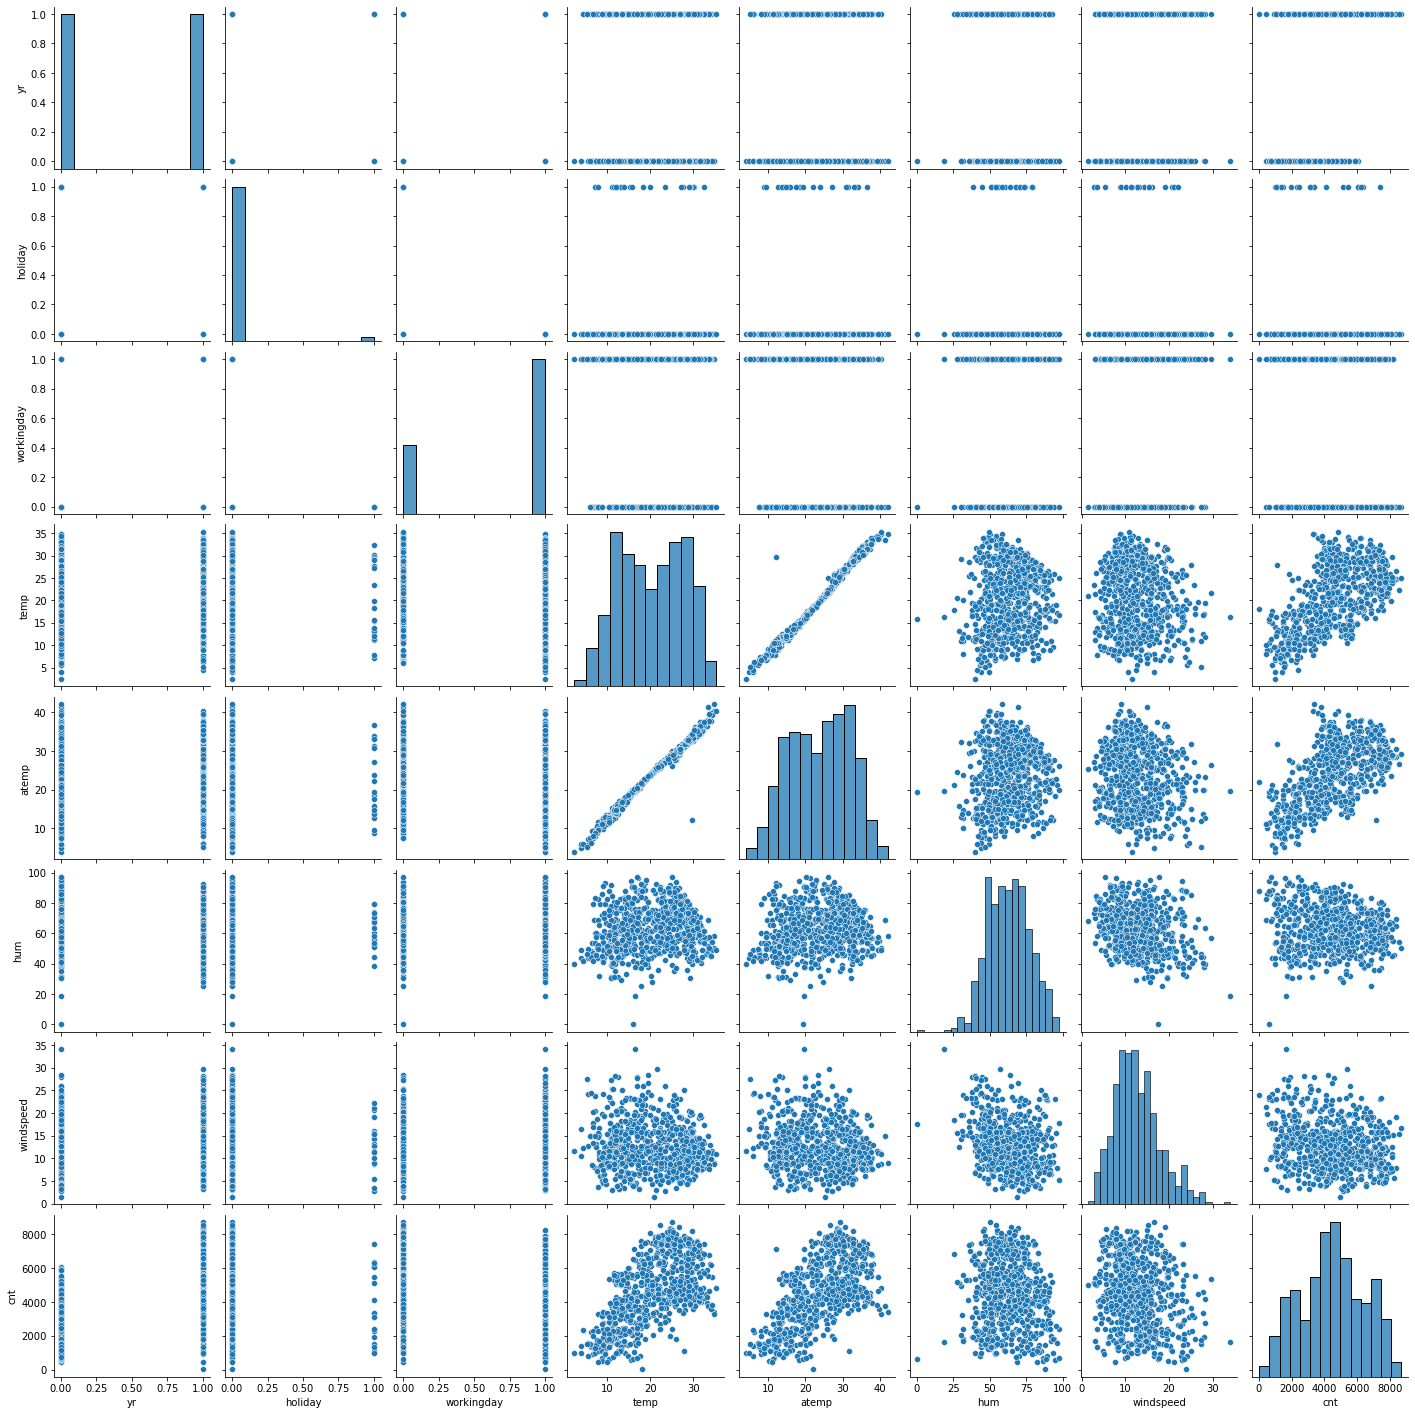

In [16]:
# Pairplot for visulization

sns.pairplot(df_1)
plt.show()

- From the above both plots, we can infer that there is a strong correlation between ('temp' and 'atemp')
- Similarly there is a very weak corrleation between ('holiday' and 'workingday'),('hum' and 'windspeed'),('windspeed' and 'cnt') & ('windspeed' and 'registered')

In [17]:
# Let us fetch the numerical summary of the data set

df_1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Categorical Variables details

- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- mnth : month ( 1 to 12)
- weekday : day of the week
- weathersit : 
		 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

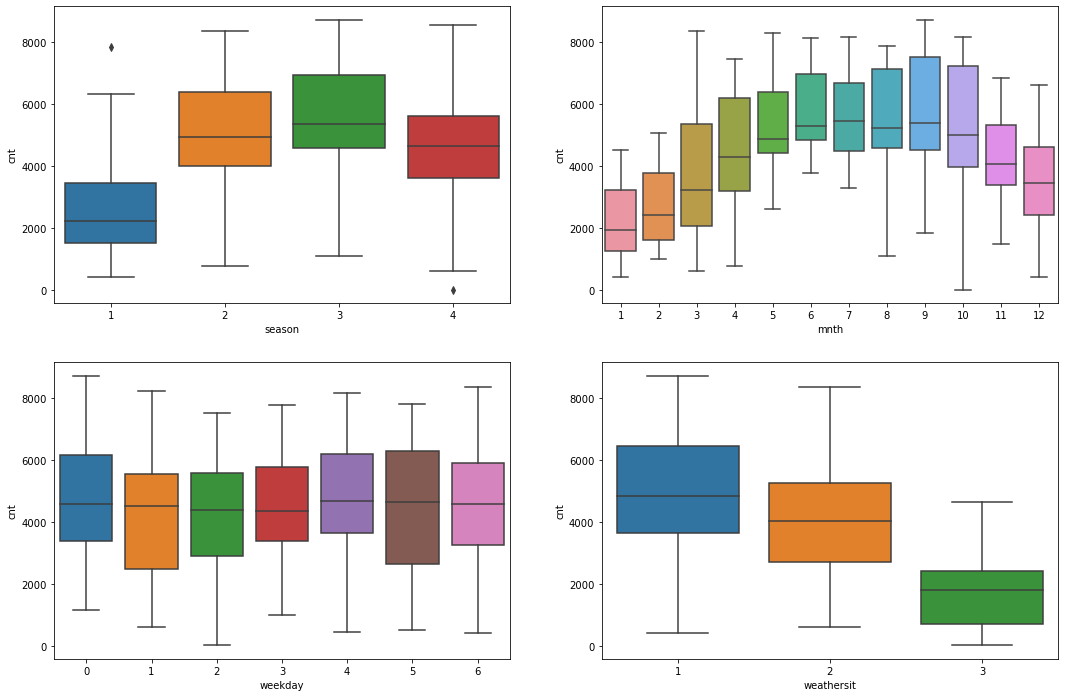

In [18]:
# Visualizing the categorical variables

plt.figure(figsize=[18,12])
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_1)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_1)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_1)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_1)
plt.show()

- From the above box plots we can infer that, from first two plots i.e, 'season' and 'months' we can see that the counts are high at the autumn or fall season which naturally comes in the 9th month which is September. The median lies between 4000 and 6000.
- Similarly the count is less for the spring season and the median lies between 2000 and 4000.
- Coming to 'weekday' we can notice that the counts of 'Sunday','Thursday' and 'Friday' are high and almost close to each other. Even the medians for all the days in the week lies between 4000 and 6000.
- Naturally the counts are high during the pleasant and clear weather and median lies between 4000 and 6000 and least in the 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' condition and median forthe same lies below 2000.

# Preparing the Data for Modelling

In [19]:
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Dummy Variables

In [20]:
# Before that we need to label the numeric data by it's category

df_1['season'] = df_1['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [21]:
# Let us check the changes applied

df_1['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: category
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [22]:
df_1['season'].unique()

['spring', 'summer', 'fall', 'winter']
Categories (4, object): ['spring', 'summer', 'fall', 'winter']

In [23]:
# Creating Dummy Variable for season
# Dropping the reduntant dummy variable

SEASONS = pd.get_dummies(df_1['season'], drop_first=True)
SEASONS.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


- 100 will correspond to summer
- 010 will correspond to fall
- 000 will correspond to spring
- 001 will correspond to winter

In [24]:
# We shall create a new data frame by the duplicate of original in order to protect the original data
df_2 = df_1
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Concat the dummy df with the original one

df_2 = pd.concat([df_2, SEASONS], axis=1)
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


- We can see that dummy df has been added to our working df

In [26]:
# We must drop the 'season' variable from df since that we have created dummy variables for efficacy

df_2 = df_2.drop('season', axis=1)
df_2.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


### - - let us do the same process with the rest of the categorical variables in the df

In [27]:
# We need to label the 'mnth' variable

df_1['mnth'] = df_1['mnth'].map({1: 'JAN', 2: 'FEB', 3: 'MAR', 4: 'APR', 5: 'MAY', 6: 'JUN', 7: 'JUL', 8: 'AUG', 9: 'SEP', 10: 'OCT', 11: 'NOV', 12: 'DEC'})

In [28]:
# let us check the changes applied

df_1.mnth.head()

0    JAN
1    JAN
2    JAN
3    JAN
4    JAN
Name: mnth, dtype: category
Categories (12, object): ['JAN', 'FEB', 'MAR', 'APR', ..., 'SEP', 'OCT', 'NOV', 'DEC']

In [29]:
df_1.mnth.unique()

['JAN', 'FEB', 'MAR', 'APR', 'MAY', ..., 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
Length: 12
Categories (12, object): ['JAN', 'FEB', 'MAR', 'APR', ..., 'SEP', 'OCT', 'NOV', 'DEC']

In [30]:
# We need to create dummy variable for 'mnth'

MONTHS = pd.get_dummies(df_1['mnth'], drop_first=True)
MONTHS

,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,1


- 00000000000 will correspond to JAN
- 00000000001 will correspond to DEC
- 00000000010 will correspond to NOV
- 00000000100 will correspond to OCT
- 00000001000 will correspond to SEP
- 00000010000 will correspond to AUG
- 00000100000 will correspond to JUL
- 00001000000 will correspond to JUN
- 00010000000 will correspond to MAY
- 00100000000 will correspond to APR
- 01000000000 will correspond to MAR
- 10000000000 will correspond to FEB

In [31]:
# Concat the dummy df with the original one

df_2 = pd.concat([df_2, MONTHS], axis=1)
df_2.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# We must drop the 'mnth' variable from df since that we have created dummy variables for efficacy

df_2 = df_2.drop('mnth', axis=1)
df_2.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# We need to label the 'weekday' variable

df_1['weekday'] = df_1['weekday'].map({0: 'SUN', 1: 'MON', 2: 'TUE', 3: 'WED', 4: 'THU', 5: 'FRI', 6: 'SAT'})

In [34]:
df_1['weekday'].head()

0    MON
1    TUE
2    WED
3    THU
4    FRI
Name: weekday, dtype: category
Categories (7, object): ['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT']

In [35]:
df_1['weekday'].unique()

['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']
Categories (7, object): ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

In [36]:
# We need to create dummy variable for 'weekday'

WEEKDAYS = pd.get_dummies(df_1['weekday'], drop_first=True)
WEEKDAYS

,MON,TUE,WED,THU,FRI,SAT
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
725,0,0,0,0,1,0
726,0,0,0,0,0,1
727,0,0,0,0,0,0
728,1,0,0,0,0,0


- 000000 correspond to SUN
- 000001 correspond to SAT
- 000010 correspond to FRI
- 000100 correspond to THU
- 001000 correspond to WED
- 010000 correspond to TUE
- 100000 correspond to MON

In [37]:
# Concat the dummy df with the original one

df_2 = pd.concat([df_2, WEEKDAYS], axis=1)
df_2.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,SEP,OCT,NOV,DEC,MON,TUE,WED,THU,FRI,SAT
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,1,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,1,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,1,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,1,0


In [38]:
# We must drop the 'weekday' variable from df since that we have created dummy variables for efficacy

df_2 = df_2.drop('weekday', axis=1)
df_2.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,SEP,OCT,NOV,DEC,MON,TUE,WED,THU,FRI,SAT
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# We need to label the 'weathersit' variable

# weathersit : 
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy [GOOD]
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist [SLIGHTLY_GOOD]
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds [SLIGHTLY_BAD]
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog [BAD]

df_1['weathersit'] = df_1['weathersit'].map({1: 'GOOD', 2: 'SLIGHTLY_GOOD', 3: 'SLIGHTLY_BAD', 4: 'BAD'})

In [40]:
df_1['weathersit'].head()

0    SLIGHTLY_GOOD
1    SLIGHTLY_GOOD
2             GOOD
3             GOOD
4             GOOD
Name: weathersit, dtype: category
Categories (3, object): ['GOOD', 'SLIGHTLY_GOOD', 'SLIGHTLY_BAD']

In [41]:
# We need to create dummy variable for 'weathersit'

WEATHERSIT = pd.get_dummies(df_1['weathersit'], drop_first=True)
WEATHERSIT

,SLIGHTLY_GOOD,SLIGHTLY_BAD
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
725,1,0
726,1,0
727,1,0
728,0,0


- 00 correspond to GOOD
- 10 correspond to SLIGHTLY_GOOD
- 01 correspond to SLIGHTLY_BAD

In [42]:
# Concat the dummy df with the original one

df_2 = pd.concat([df_2, WEATHERSIT], axis=1)
df_2.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,0,0,0,0,1,0,0,0


In [43]:
# We must drop the 'weathersit' variable from df since that we have created dummy variables for efficacy

df_2 = df_2.drop('weathersit', axis=1)
df_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
df_2.shape

(730, 30)

# Splitting into train and test

In [45]:
np.random.seed(0)
df_train, df_test = train_test_split(df_2, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


# Rescaling the features

In [46]:
# Instantiate an object

scaler = MinMaxScaler()

In [47]:
df_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'MON', 'TUE', 'WED', 'THU',
       'FRI', 'SAT', 'SLIGHTLY_GOOD', 'SLIGHTLY_BAD'],
      dtype='object')

In [48]:
# create a list of numeric variable

num_vars = ['temp','atemp','hum','windspeed']

In [49]:
# Fit on the data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,1,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,1,0,...,0,0,0,0,0,0,0,0,1,0


In [50]:
df_train[num_vars].shape

(510, 4)

In [51]:
df_train[num_vars].describe()

,temp,atemp,hum,windspeed
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883
std,0.225858,0.212410,0.145846,0.169803
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179
50%,0.542596,0.529718,0.653714,0.296763
75%,0.735215,0.688457,0.754830,0.414447
max,1.000000,1.000000,1.000000,1.000000


- we can see that maximum value for all the numerical data are 1, which is what we wanted

# Training the Model

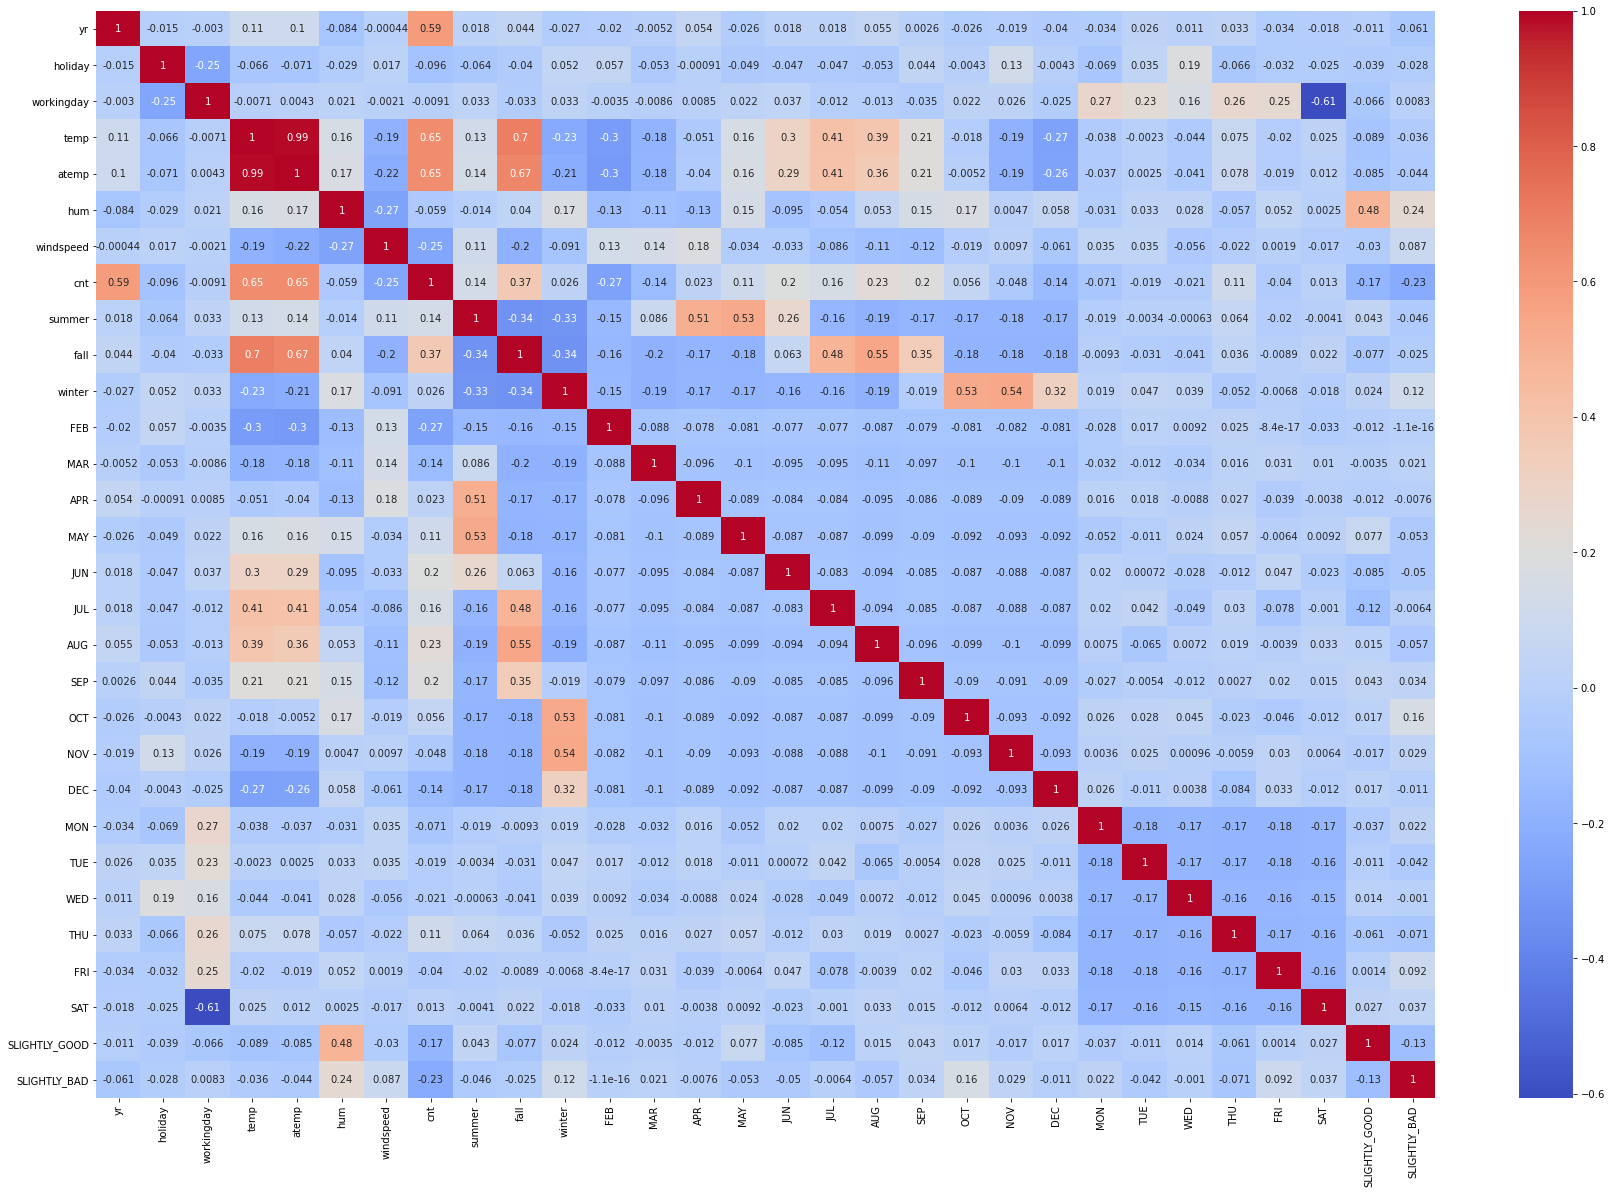

In [52]:
# Heat map to see the correlation between the variables

plt.figure(figsize=[30,20])
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.show()

- From the diagram we can see 'temp' and 'atemp' is mostly correlated with 'cnt'

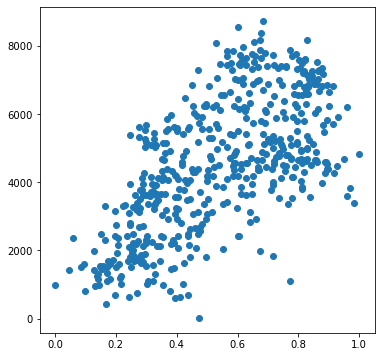

In [53]:
# let us plot scatter plot between temp and cnt

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

- So, we will pick temp as the first variable and we'll try to fit a regression line to that.

In [54]:
# X_train , y_train

y_train = df_train.pop('cnt')
X_train = df_train

In [55]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

In [57]:
X_train.shape

(510, 29)

In [58]:
y_train.shape

(510,)

# Building a Linear Model

In [59]:
#add a constant

X_train_sm = sm.add_constant(X_train['temp'])

# create first model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.params

const    1491.214309
temp     5571.088025
dtype: float64

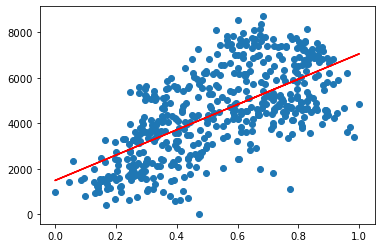

In [60]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_sm.iloc[:, 1], y_train)
plt.plot(X_train_sm.iloc[:, 1], 1491.214 + 5571.088*X_train_sm.iloc[:, 1], 'r')
plt.show()

In [61]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           2.46e-61
Time:                        23:20:53   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.000    1155.897    1826.531
temp        5571.0880    292.813     19.026      0.000    4995.815    6146.361
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- From the above summary, we can see that coefficients are 1491.214 for constant and 5571.0880 for temp
- The P values are zero for both intercept and temp, which means the result is statistically significant.
- The R-squared is 0.416, about 41.6% of variance in 'cnt' is explained by the variable 'temp' and which is not bad. But we can try to make it better since we are having other variables as well.

## adding another variable

In [62]:
# let us assign the feature variables to X

X_train_sm = X_train[['temp','atemp']]

# add constant

X_train_sm = sm.add_constant(X_train_sm)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.params


const    1435.873212
temp     1611.017958
atemp    4255.309090
dtype: float64

In [63]:
# let us look at the summary of the same

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           8.38e-61
Time:                        23:20:53   Log-Likelihood:                -4447.7
No. Observations:                 510   AIC:                             8901.
Df Residuals:                     507   BIC:                             8914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1435.8732    172.475      8.325      0.000    1097.020    1774.726
temp        1611.0180   2023.854      0.796      0.426   -2365.154    5587.190
atemp       4255.3091   2151.989      1.977      0.049      27.395    8483.223
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- from the above summary we can notice that in the p values variables are not significant, it may be indicating some multicollinearity between variables. 
- there is only marginal change in R-squared and Adj. R-squared.
- We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

# RFE

## Adding all the variables to the model to have a quick insight

In [64]:
df_2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'summer', 'fall', 'winter', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'MON', 'TUE', 'WED', 'THU',
       'FRI', 'SAT', 'SLIGHTLY_GOOD', 'SLIGHTLY_BAD'],
      dtype='object')

In [65]:
# build a model with all variables

# add constant 

X_train_sm = sm.add_constant(X_train)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.24e-177
Time:                        23:20:54   Log-Likelihood:                -4102.7
No. Observations:                 510   AIC:                             8265.
Df Residuals:                     480   BIC:                             8392.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2079.2957    263.055      7.904      0.000    1562.413    2596.178
yr             2009.7544     70.866     28.360      0.000    1870.508    2149.001
holiday       -1169.5077    569.440     -2.054      0.041   -2288.411     -50.605
workingday     -525.6684    618.955     -0.849      0.396   -1741.865     690.528
temp           3366.6047   1247.170      2.699      0.007     916.018    5817.191
atemp           475.2925   1211.893      0.392      0.695   -1905.979    2856.564
hum           -1372.1930    338.791     -4.050      0.000   -2037.889    -706.497
windspeed     -1566.6529    232.078     -6.751      0.000   -2022.668   -1110.638
summer          753.6805    207.490      3.632      0.000     345.980    1161.381
fall            355.2929    263.379      1.349      0.178    -162.225     872.810
winter         1329.8242    228.393      5.823      0.000     881.050    1778.599
FEB             232.1868    180.935      1.283      0.200    -123.336     587.709
MAR             565.3632    196.453      2.878      0.004     179.348     951.378
APR             556.4133    294.909      1.887      0.060     -23.059    1135.885
MAY             778.5013    317.862      2.449      0.015     153.927    1403.075
JUN             640.7885    341.941      1.874      0.062     -31.098    1312.675
JUL             318.3900    386.268      0.824      0.410    -440.594    1077.374
AUG             808.9688    368.228      2.197      0.029      85.432    1532.506
SEP            1352.2784    328.479      4.117      0.000     706.845    1997.712
OCT             606.5777    302.921      2.002      0.046      11.362    1201.793
NOV             212.7056    288.915      0.736      0.462    -354.989     780.400
DEC             170.3241    232.958      0.731      0.465    -287.420     628.068
MON             219.1947    623.307      0.352      0.725   -1005.553    1443.942
TUE             206.4922    620.106      0.333      0.739   -1011.965    1424.949
WED             344.4474    615.628      0.560      0.576    -865.212    1554.107
THU             470.0403    624.465      0.753      0.452    -756.982    1697.062
FRI             433.5454    622.994      0.696      0.487    -790.588    1657.678
SAT             -50.7690    134.459     -0.378      0.706    -314.969     213.431
SLIGHTLY_GOOD  -502.4553     91.581     -5.486      0.000    -682.404    -322.506
SLIGHTLY_BAD  -2166.3728    232.346     -9.324      0.000   -2622.913   -1709.832
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59e-46
Kurtosis:                       5.724   Cond. No.            

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [66]:
# Creating a dataframe that contains the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,445.99
4,atemp,381.74
2,workingday,229.52
21,MON,50.79
22,TUE,49.63
25,FRI,48.17
24,THU,47.11
23,WED,43.27
5,hum,22.75
8,fall,15.38


- 'TUE' has higher p-value as well as VIF. Hence we may drop it first.

In [67]:
X = X_train.drop('TUE', axis=1)

In [68]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.50
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.31e-178
Time:                        23:20:54   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     481   BIC:                             8386.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2078.2959    262.795      7.908      0.000    1561.928    2594.664
yr             2011.1829     70.671     28.458      0.000    1872.321    2150.045
holiday        -999.1963    250.123     -3.995      0.000   -1490.665    -507.727
workingday     -324.1002    129.089     -2.511      0.012    -577.749     -70.452
temp           3376.5559   1245.659      2.711      0.007     928.951    5824.161
atemp           469.9694   1210.667      0.388      0.698   -1908.881    2848.819
hum           -1367.1826    338.144     -4.043      0.000   -2031.604    -702.762
windspeed     -1568.5909    231.791     -6.767      0.000   -2024.039   -1113.143
summer          752.9041    207.285      3.632      0.000     345.608    1160.200
fall            353.9302    263.103      1.345      0.179    -163.044     870.904
winter         1326.5945    227.976      5.819      0.000     878.642    1774.547
FEB             232.7422    180.760      1.288      0.199    -122.435     587.919
MAR             563.7136    196.209      2.873      0.004     178.180     949.247
APR             555.7477    294.629      1.886      0.060     -23.172    1134.668
MAY             775.3651    317.429      2.443      0.015     151.646    1399.084
JUN             637.7493    341.503      1.867      0.062     -33.273    1308.772
JUL             315.4053    385.807      0.818      0.414    -442.669    1073.480
AUG             805.3992    367.731      2.190      0.029      82.841    1527.957
SEP            1351.3343    328.163      4.118      0.000     706.525    1996.144
OCT             607.3046    302.633      2.007      0.045      12.658    1201.951
NOV             207.6328    288.246      0.720      0.472    -358.745     774.010
DEC             171.0395    232.733      0.735      0.463    -286.259     628.338
MON              15.8679    125.102      0.127      0.899    -229.946     261.682
WED             144.0143    129.119      1.115      0.265    -109.694     397.722
THU             266.5092    127.844      2.085      0.038      15.307     517.711
FRI             230.4786    127.328      1.810      0.071     -19.710     480.667
SAT             -55.3091    133.642     -0.414      0.679    -317.903     207.285
SLIGHTLY_GOOD  -502.4981     91.496     -5.492      0.000    -682.280    -322.717
SLIGHTLY_BAD  -2166.8139    232.127     -9.335      0.000   -2622.922   -1710.706
==============================================================================
Omnibus:                       78.681   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.844
Skew:                          -0.770   Prob(JB):                     2.00e-45
Kurtosis:                       5.704   Cond. No.                         92.7
================================================================

In [69]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,445.74
4,atemp,381.67
5,hum,22.69
8,fall,15.37
16,AUG,10.98
9,winter,10.85
2,workingday,9.65
15,JUL,9.61
7,summer,8.97
14,JUN,7.49


- from the above outputs we can definitely say that 'atemp' has a very high P-value as well as high VIF value.
- Hence, we may drop 'atemp' variable from the model as per the thumb rule of stats model.

In [70]:
X = X.drop('atemp', axis=1)

In [71]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     101.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.39e-179
Time:                        23:20:54   Log-Likelihood:                -4102.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     482   BIC:                             8380.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2081.9264    262.397      7.934      0.000    1566.343    2597.510
yr             2010.4361     70.583     28.483      0.000    1871.749    2149.124
holiday       -1003.5664    249.650     -4.020      0.000   -1494.102    -513.031
workingday     -323.5131    128.967     -2.509      0.012    -576.919     -70.107
temp           3833.6278    406.206      9.438      0.000    3035.475    4631.781
hum           -1362.8420    337.661     -4.036      0.000   -2026.311    -699.373
windspeed     -1587.8603    226.214     -7.019      0.000   -2032.347   -1143.373
summer          753.9381    207.085      3.641      0.000     347.037    1160.839
fall            349.7370    262.650      1.332      0.184    -166.343     865.817
winter         1326.7480    227.775      5.825      0.000     879.193    1774.303
FEB             233.3716    180.593      1.292      0.197    -121.476     588.219
MAR             563.4344    196.035      2.874      0.004     178.245     948.623
APR             557.4291    294.338      1.894      0.059     -20.915    1135.773
MAY             770.0461    316.854      2.430      0.015     147.461    1392.631
JUN             628.1659    340.309      1.846      0.066     -40.507    1296.839
JUL             307.4985    384.929      0.799      0.425    -448.847    1063.844
AUG             792.0937    365.808      2.165      0.031      73.319    1510.868
SEP            1346.6580    327.652      4.110      0.000     702.854    1990.462
OCT             607.7847    302.364      2.010      0.045      13.670    1201.899
NOV             209.2929    287.961      0.727      0.468    -356.520     775.106
DEC             172.9731    232.475      0.744      0.457    -283.816     629.762
MON              15.7349    124.991      0.126      0.900    -229.861     261.330
WED             143.7099    129.003      1.114      0.266    -109.768     397.188
THU             266.2763    127.730      2.085      0.038      15.300     517.253
FRI             229.9969    127.210      1.808      0.071     -19.958     479.952
SAT             -58.8348    133.215     -0.442      0.659    -320.589     202.920
SLIGHTLY_GOOD  -502.8512     91.411     -5.501      0.000    -682.464    -323.238
SLIGHTLY_BAD  -2172.9047    231.392     -9.391      0.000   -2627.566   -1718.243
==============================================================================
Omnibus:                       78.011   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.576
Skew:                          -0.765   Prob(JB):                     6.22e-45
Kurtosis:                       5.691   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

In [72]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,46.84
4,hum,22.55
7,fall,15.35
15,AUG,10.88
8,winter,10.85
2,workingday,9.64
14,JUL,9.58
6,summer,8.97
13,JUN,7.46
16,SEP,7.31


- As per the importance of the 'temp' variable in the model we have decided not to drop it though it has high VIF.
- we can see that after dropping the 'atemp' variable there is decline in the VIF of 'temp' variable

- As per the stats model thumb rule we shall drop 'NOV' for having both higher p-value and VIF.

In [73]:
X = X.drop('NOV', axis=1)

In [74]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     105.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.74e-180
Time:                        23:20:55   Log-Likelihood:                -4103.1
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     483   BIC:                             8375.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2099.2610    261.183      8.037      0.000    1586.065    2612.457
yr             2007.4185     70.426     28.504      0.000    1869.040    2145.797
holiday        -987.6164    248.562     -3.973      0.000   -1476.012    -499.221
workingday     -321.4548    128.873     -2.494      0.013    -574.675     -68.235
temp           3892.4573    397.865      9.783      0.000    3110.697    4674.218
hum           -1367.1128    337.445     -4.051      0.000   -2030.154    -704.072
windspeed     -1571.6508    225.002     -6.985      0.000   -2013.754   -1129.548
summer          787.9272    201.637      3.908      0.000     391.733    1184.122
fall            420.7142    243.701      1.726      0.085     -58.131     899.559
winter         1456.0037    142.249     10.236      0.000    1176.500    1735.507
FEB             193.6178    172.027      1.126      0.261    -144.396     531.632
MAR             504.9069    178.645      2.826      0.005     153.889     855.924
APR             471.5298    269.436      1.750      0.081     -57.882    1000.941
MAY             678.0477    290.331      2.335      0.020     107.581    1248.515
JUN             514.8509    302.348      1.703      0.089     -79.228    1108.930
JUL             166.0057    331.909      0.500      0.617    -486.159     818.170
AUG             654.5771    312.923      2.092      0.037      39.719    1269.435
SEP            1202.3085    260.471      4.616      0.000     690.512    1714.105
OCT             427.1386    172.104      2.482      0.013      88.973     765.304
DEC              42.7835    148.113      0.289      0.773    -248.242     333.809
MON              19.1028    124.845      0.153      0.878    -226.203     264.408
WED             141.6042    128.908      1.098      0.273    -111.685     394.893
THU             266.1468    127.668      2.085      0.038      15.294     516.999
FRI             231.5313    127.131      1.821      0.069     -18.266     481.329
SAT             -54.7297    133.030     -0.411      0.681    -316.120     206.660
SLIGHTLY_GOOD  -503.7174     91.359     -5.514      0.000    -683.227    -324.208
SLIGHTLY_BAD  -2170.2447    231.250     -9.385      0.000   -2624.625   -1715.864
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.597
Skew:                          -0.751   Prob(JB):                     2.04e-43
Kurtosis:                       5.644   Cond. No.                         36.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,44.73
4,hum,22.46
7,fall,13.19
2,workingday,9.63
6,summer,8.52
15,AUG,7.97
14,JUL,7.14
12,MAY,6.03
13,JUN,5.92
11,APR,4.78


- We are now dropping 'JUL' variable since it is holding higher p-value and VIF in our model.

In [76]:
X = X.drop('JUL', axis=1)

In [77]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.86e-181
Time:                        23:20:55   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8259.
Df Residuals:                     484   BIC:                             8369.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2098.7468    260.979      8.042      0.000    1585.955    2611.538
yr             2005.1161     70.221     28.554      0.000    1867.141    2143.091
holiday       -1000.1803    247.097     -4.048      0.000   -1485.696    -514.664
workingday     -320.1117    128.745     -2.486      0.013    -573.079     -67.144
temp           4006.7679    325.418     12.313      0.000    3367.361    4646.175
hum           -1391.0535    333.774     -4.168      0.000   -2046.878    -735.229
windspeed     -1577.2463    224.549     -7.024      0.000   -2018.458   -1136.034
summer          820.2130    190.877      4.297      0.000     445.163    1195.263
fall            482.6539    209.727      2.301      0.022      70.567     894.741
winter         1444.5095    140.272     10.298      0.000    1168.893    1720.126
FEB             178.7552    169.310      1.056      0.292    -153.918     511.429
MAR             463.7385    158.430      2.927      0.004     152.444     775.033
APR             400.1071    228.304      1.753      0.080     -48.482     848.696
MAY             591.0187    232.230      2.545      0.011     134.716    1047.322
JUN             401.3285    199.586      2.011      0.045       9.166     793.491
AUG             519.5947    158.258      3.283      0.001     208.636     830.553
SEP            1097.3147    154.080      7.122      0.000     794.566    1400.063
OCT             398.2327    161.985      2.458      0.014      79.953     716.512
DEC              31.3686    146.231      0.215      0.830    -255.957     318.694
MON              20.0533    124.733      0.161      0.872    -225.032     265.139
WED             140.4609    128.788      1.091      0.276    -112.591     393.513
THU             262.4883    127.359      2.061      0.040      12.243     512.733
FRI             226.2803    126.598      1.787      0.075     -22.470     475.030
SAT             -56.3510    132.888     -0.424      0.672    -317.460     204.757
SLIGHTLY_GOOD  -500.5797     91.072     -5.497      0.000    -679.526    -321.634
SLIGHTLY_BAD  -2165.0865    230.841     -9.379      0.000   -2618.661   -1711.512
==============================================================================
Omnibus:                       74.997   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.646
Skew:                          -0.745   Prob(JB):                     4.00e-42
Kurtosis:                       5.598   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.71
4,hum,21.56
7,fall,9.78
2,workingday,9.62
6,summer,7.64
5,windspeed,4.32
8,winter,4.03
12,MAY,3.86
11,APR,3.42
13,JUN,2.58


- we can now drop 'MON' for it's high p-value and low VIF.

In [79]:
X = X.drop('MON', axis=1)

In [80]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.75e-182
Time:                        23:20:56   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     485   BIC:                             8362.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2101.9307    259.965      8.085      0.000    1591.134    2612.727
yr             2004.7403     70.111     28.594      0.000    1866.981    2142.500
holiday        -994.0873    243.928     -4.075      0.000   -1473.374    -514.801
workingday     -310.0446    112.378     -2.759      0.006    -530.852     -89.237
temp           4005.4772    324.992     12.325      0.000    3366.910    4644.044
hum           -1393.8409    332.988     -4.186      0.000   -2048.118    -739.564
windspeed     -1577.9036    224.287     -7.035      0.000   -2018.597   -1137.210
summer          820.3937    190.682      4.302      0.000     445.729    1195.059
fall            482.2154    209.498      2.302      0.022      70.579     893.852
winter         1443.3111    139.933     10.314      0.000    1168.362    1718.261
FEB             177.4634    168.949      1.050      0.294    -154.499     509.426
MAR             462.7704    158.156      2.926      0.004     152.015     773.526
APR             399.4568    228.039      1.752      0.080     -48.609     847.523
MAY             590.2667    231.949      2.545      0.011     134.517    1046.016
JUN             401.4534    199.384      2.013      0.045       9.690     793.217
AUG             520.8746    157.899      3.299      0.001     210.623     831.126
SEP            1097.7453    153.902      7.133      0.000     795.348    1400.143
OCT             399.0431    161.743      2.467      0.014      81.239     716.847
DEC              32.0969    146.014      0.220      0.826    -254.800     318.994
WED             130.7230    113.541      1.151      0.250     -92.370     353.816
THU             252.5022    111.073      2.273      0.023      34.258     470.746
FRI             216.1513    109.697      1.970      0.049       0.611     431.691
SAT             -56.5789    132.747     -0.426      0.670    -317.409     204.251
SLIGHTLY_GOOD  -500.3541     90.970     -5.500      0.000    -679.098    -321.610
SLIGHTLY_BAD  -2162.9273    230.218     -9.395      0.000   -2615.276   -1710.579
==============================================================================
Omnibus:                       74.862   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.930
Skew:                          -0.743   Prob(JB):                     3.47e-42
Kurtosis:                       5.604   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.71
4,hum,21.56
7,fall,9.78
6,summer,7.64
2,workingday,7.09
5,windspeed,4.32
8,winter,4.02
12,MAY,3.86
11,APR,3.42
13,JUN,2.58


- Now we are dropping 'DEC' for the same reason higher p-value and low VIF

In [82]:
X = X.drop('DEC', axis=1)

In [83]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.62e-183
Time:                        23:20:56   Log-Likelihood:                -4103.3
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     486   BIC:                             8356.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2108.9735    257.730      8.183      0.000    1602.570    2615.377
yr             2004.5912     70.039     28.621      0.000    1866.974    2142.209
holiday        -998.1936    242.974     -4.108      0.000   -1475.602    -520.785
workingday     -311.8881    111.955     -2.786      0.006    -531.863     -91.913
temp           3998.0109    322.896     12.382      0.000    3363.567    4632.455
hum           -1387.1915    331.286     -4.187      0.000   -2038.122    -736.261
windspeed     -1578.6205    224.043     -7.046      0.000   -2018.833   -1138.408
summer          819.5054    190.453      4.303      0.000     445.293    1193.718
fall            481.1031    209.232      2.299      0.022      69.992     892.214
winter         1449.3538    137.072     10.574      0.000    1180.027    1718.680
FEB             171.1814    166.352      1.029      0.304    -155.676     498.039
MAR             457.4602    156.147      2.930      0.004     150.653     764.267
APR             395.6268    227.149      1.742      0.082     -50.689     841.943
MAY             586.6273    231.131      2.538      0.011     132.488    1040.767
JUN             399.1872    198.923      2.007      0.045       8.333     790.042
AUG             518.6979    157.434      3.295      0.001     209.362     828.033
SEP            1093.0660    152.274      7.178      0.000     793.870    1392.262
OCT             387.6233    153.023      2.533      0.012      86.954     688.292
WED             130.9754    113.424      1.155      0.249     -91.886     353.837
THU             251.8781    110.928      2.271      0.024      33.920     469.836
FRI             216.8333    109.546      1.979      0.048       1.592     432.075
SAT             -58.1601    132.422     -0.439      0.661    -318.350     202.030
SLIGHTLY_GOOD  -501.5537     90.717     -5.529      0.000    -679.800    -323.307
SLIGHTLY_BAD  -2165.1786    229.765     -9.423      0.000   -2616.634   -1713.723
==============================================================================
Omnibus:                       75.169   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.187
Skew:                          -0.745   Prob(JB):                     1.85e-42
Kurtosis:                       5.613   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.49
4,hum,20.24
7,fall,9.77
6,summer,7.64
2,workingday,7.08
5,windspeed,4.31
12,MAY,3.84
8,winter,3.83
11,APR,3.41
13,JUN,2.57


- Let us now drop 'SAT' for having high p-value in the model

In [85]:
X = X.drop('SAT', axis=1)

In [86]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.57e-184
Time:                        23:20:56   Log-Likelihood:                -4103.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     487   BIC:                             8350.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2079.6180    248.707      8.362      0.000    1590.948    2568.288
yr             2005.5255     69.949     28.671      0.000    1868.086    2142.965
holiday        -974.9436    236.940     -4.115      0.000   -1440.495    -509.392
workingday     -283.8766     91.936     -3.088      0.002    -464.516    -103.237
temp           3994.8557    322.548     12.385      0.000    3361.097    4628.614
hum           -1386.7375    331.010     -4.189      0.000   -2037.122    -736.353
windspeed     -1576.6529    223.813     -7.045      0.000   -2016.410   -1136.895
summer          820.8085    190.272      4.314      0.000     446.954    1194.663
fall            484.5473    208.912      2.319      0.021      74.068     895.027
winter         1449.6701    136.956     10.585      0.000    1180.572    1718.768
FEB             173.2983    166.144      1.043      0.297    -153.149     499.746
MAR             458.0718    156.012      2.936      0.003     151.533     764.611
APR             395.0740    226.958      1.741      0.082     -50.863     841.011
MAY             585.7810    230.931      2.537      0.012     132.036    1039.526
JUN             399.6386    198.755      2.011      0.045       9.115     790.162
AUG             516.3060    157.209      3.284      0.001     207.413     825.199
SEP            1092.1135    152.132      7.179      0.000     793.197    1391.030
OCT             388.7748    152.874      2.543      0.011      88.401     689.149
WED             131.7837    113.315      1.163      0.245     -90.863     354.430
THU             252.0373    110.836      2.274      0.023      34.262     469.812
FRI             217.3740    109.448      1.986      0.048       2.325     432.422
SLIGHTLY_GOOD  -500.6895     90.621     -5.525      0.000    -678.745    -322.634
SLIGHTLY_BAD  -2169.7088    229.343     -9.461      0.000   -2620.333   -1719.084
==============================================================================
Omnibus:                       74.163   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.481
Skew:                          -0.735   Prob(JB):                     7.16e-42
Kurtosis:                       5.599   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.36
4,hum,18.75
7,fall,9.77
6,summer,7.64
2,workingday,5.03
5,windspeed,4.24
12,MAY,3.84
8,winter,3.82
11,APR,3.41
13,JUN,2.57


- Let us now drop 'FEB' for having high p-value and low VIF

In [88]:
X = X.drop('FEB', axis=1)

In [89]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.32e-185
Time:                        23:20:56   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     488   BIC:                             8345.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2141.1827    241.623      8.862      0.000    1666.433    2615.933
yr             2004.9300     69.953     28.661      0.000    1867.484    2142.376
holiday        -971.8196    236.943     -4.101      0.000   -1437.374    -506.266
workingday     -283.6241     91.944     -3.085      0.002    -464.279    -102.970
temp           4009.8007    322.259     12.443      0.000    3376.614    4642.987
hum           -1406.3996    330.503     -4.255      0.000   -2055.784    -757.016
windspeed     -1561.5431    223.363     -6.991      0.000   -2000.416   -1122.670
summer          795.3850    188.721      4.215      0.000     424.579    1166.191
fall            423.8212    200.654      2.112      0.035      29.570     818.073
winter         1389.3309    124.151     11.191      0.000    1145.395    1633.267
MAR             403.1076    146.856      2.745      0.006     114.559     691.656
APR             354.3676    223.597      1.585      0.114     -84.965     793.700
MAY             547.1101    227.957      2.400      0.017      99.213     995.008
JUN             370.5629    196.808      1.883      0.060     -16.133     757.259
AUG             510.9194    157.139      3.251      0.001     202.167     819.672
SEP            1088.7534    152.112      7.158      0.000     789.879    1387.628
OCT             386.3380    152.870      2.527      0.012      85.973     686.703
WED             133.0559    113.318      1.174      0.241     -89.596     355.708
THU             258.9961    110.645      2.341      0.020      41.598     476.395
FRI             217.9623    109.456      1.991      0.047       2.898     433.026
SLIGHTLY_GOOD  -499.1395     90.617     -5.508      0.000    -677.186    -321.093
SLIGHTLY_BAD  -2157.6894    229.074     -9.419      0.000   -2607.783   -1707.596
==============================================================================
Omnibus:                       74.571   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.038
Skew:                          -0.740   Prob(JB):                     5.42e-42
Kurtosis:                       5.598   Cond. No.                         22.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.14
4,hum,18.12
7,fall,9.03
6,summer,7.50
2,workingday,5.02
5,windspeed,4.04
11,MAY,3.74
10,APR,3.33
8,winter,3.22
12,JUN,2.53


- Let us now drop 'WED' for having high p-value and low VIF

In [91]:
X = X.drop('WED', axis=1)

In [92]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.87e-186
Time:                        23:20:57   Log-Likelihood:                -4104.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     489   BIC:                             8340.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2153.2039    241.500      8.916      0.000    1678.699    2627.709
yr             2006.7525     69.963     28.683      0.000    1869.287    2144.218
holiday        -894.9970    227.819     -3.929      0.000   -1342.622    -447.372
workingday     -244.8870     85.854     -2.852      0.005    -413.576     -76.198
temp           3999.5370    322.265     12.411      0.000    3366.342    4632.732
hum           -1413.2353    330.579     -4.275      0.000   -2062.767    -763.704
windspeed     -1582.0558    222.765     -7.102      0.000   -2019.751   -1144.360
summer          797.1044    188.788      4.222      0.000     426.168    1168.041
fall            422.8150    200.729      2.106      0.036      28.416     817.214
winter         1387.0986    124.184     11.170      0.000    1143.098    1631.099
MAR             403.9935    146.911      2.750      0.006     115.339     692.648
APR             353.4571    223.682      1.580      0.115     -86.040     792.954
MAY             555.1961    227.941      2.436      0.015     107.332    1003.060
JUN             371.1930    196.884      1.885      0.060     -15.650     758.036
AUG             519.9170    157.013      3.311      0.001     211.414     828.420
SEP            1091.9044    152.147      7.177      0.000     792.962    1390.846
OCT             392.6406    152.835      2.569      0.010      92.347     692.935
THU             220.4779    105.711      2.086      0.038      12.775     428.181
FRI             178.9823    104.341      1.715      0.087     -26.030     383.994
SLIGHTLY_GOOD  -495.9751     90.612     -5.474      0.000    -674.011    -317.939
SLIGHTLY_BAD  -2150.2080    229.074     -9.387      0.000   -2600.299   -1700.117
==============================================================================
Omnibus:                       75.291   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.274
Skew:                          -0.755   Prob(JB):                     2.16e-41
Kurtosis:                       5.556   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,29.13
4,hum,18.12
7,fall,9.03
6,summer,7.50
2,workingday,4.33
5,windspeed,4.03
11,MAY,3.73
10,APR,3.33
8,winter,3.22
12,JUN,2.53


- Let us now drop 'APR' for having high p-value and low VIF

In [94]:
X = X.drop('APR', axis=1)

In [95]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.09e-186
Time:                        23:20:57   Log-Likelihood:                -4106.0
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     490   BIC:                             8337.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2182.2357    241.167      9.049      0.000    1708.386    2656.085
yr             2009.3369     70.051     28.684      0.000    1871.700    2146.973
holiday        -900.5040    228.140     -3.947      0.000   -1348.757    -452.251
workingday     -243.4761     85.981     -2.832      0.005    -412.412     -74.540
temp           4042.1929    321.623     12.568      0.000    3410.263    4674.123
hum           -1457.7799    329.878     -4.419      0.000   -2105.930    -809.630
windspeed     -1554.6875    222.430     -6.990      0.000   -1991.722   -1117.653
summer         1005.9939    134.986      7.453      0.000     740.771    1271.217
fall            418.6424    201.018      2.083      0.038      23.678     813.607
winter         1363.0546    123.437     11.043      0.000    1120.524    1605.585
MAR             294.8836    129.871      2.271      0.024      39.711     550.056
MAY             310.2302    167.361      1.854      0.064     -18.603     639.064
JUN             192.1850    161.274      1.192      0.234    -124.688     509.058
AUG             480.3199    155.237      3.094      0.002     175.308     785.332
SEP            1064.1060    151.357      7.030      0.000     766.717    1361.495
OCT             386.0971    153.012      2.523      0.012      85.457     686.738
THU             218.4306    105.864      2.063      0.040      10.427     426.434
FRI             181.8256    104.485      1.740      0.082     -23.468     387.119
SLIGHTLY_GOOD  -494.2411     90.743     -5.447      0.000    -672.535    -315.947
SLIGHTLY_BAD  -2146.1880    229.410     -9.355      0.000   -2596.936   -1695.440
==============================================================================
Omnibus:                       76.967   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.941
Skew:                          -0.770   Prob(JB):                     2.09e-42
Kurtosis:                       5.581   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [96]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,28.84
4,hum,18.08
7,fall,9.03
2,workingday,4.33
5,windspeed,3.95
6,summer,3.83
8,winter,3.18
17,SLIGHTLY_GOOD,2.23
0,yr,2.06
10,MAY,1.98


- Let us now drop 'JUN' for having high p-value and low VIF

In [97]:
X = X.drop('JUN', axis=1)

In [98]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.0
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.77e-187
Time:                        23:20:57   Log-Likelihood:                -4106.7
No. Observations:                 510   AIC:                             8251.
Df Residuals:                     491   BIC:                             8332.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2176.7978    241.227      9.024      0.000    1702.833    2650.763
yr             2004.1853     69.947     28.653      0.000    1866.753    2141.618
holiday        -910.3429    228.088     -3.991      0.000   -1358.492    -462.194
workingday     -240.5321     85.982     -2.797      0.005    -409.470     -71.594
temp           4186.5973    298.049     14.047      0.000    3600.989    4772.205
hum           -1493.4680    328.656     -4.544      0.000   -2139.214    -847.722
windspeed     -1577.4287    221.705     -7.115      0.000   -2013.036   -1141.822
summer         1026.5568    133.936      7.665      0.000     763.398    1289.715
fall            381.3388    198.651      1.920      0.055      -8.972     771.650
winter         1343.0367    122.341     10.978      0.000    1102.661    1583.412
MAR             262.4993    127.050      2.066      0.039      12.871     512.128
MAY             232.2760    154.113      1.507      0.132     -70.525     535.077
AUG             436.5094    150.885      2.893      0.004     140.050     732.969
SEP            1033.5649    149.235      6.926      0.000     740.347    1326.783
OCT             368.0709    152.327      2.416      0.016      68.777     667.365
THU             212.2670    105.783      2.007      0.045       4.424     420.110
FRI             188.8172    104.364      1.809      0.071     -16.239     393.873
SLIGHTLY_GOOD  -490.7027     90.733     -5.408      0.000    -668.976    -312.429
SLIGHTLY_BAD  -2144.8040    229.505     -9.345      0.000   -2595.737   -1693.871
==============================================================================
Omnibus:                       76.456   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.732
Skew:                          -0.774   Prob(JB):                     4.66e-41
Kurtosis:                       5.519   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.67
4,hum,17.63
7,fall,8.81
2,workingday,4.33
5,windspeed,3.90
6,summer,3.77
8,winter,3.12
16,SLIGHTLY_GOOD,2.22
0,yr,2.05
11,AUG,1.85


- Let us now drop 'MAY' for having high p-value and low VIF

In [100]:
X = X.drop('MAY', axis=1)

In [101]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.24e-188
Time:                        23:20:58   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8252.
Df Residuals:                     492   BIC:                             8328.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2134.6762    239.912      8.898      0.000    1663.297    2606.055
yr             1998.6451     69.940     28.576      0.000    1861.226    2136.064
holiday        -920.4211    228.284     -4.032      0.000   -1368.954    -471.889
workingday     -242.6616     86.081     -2.819      0.005    -411.794     -73.529
temp           4265.0464    293.848     14.514      0.000    3687.696    4842.397
hum           -1429.1531    326.295     -4.380      0.000   -2070.257    -788.049
windspeed     -1592.8940    221.753     -7.183      0.000   -2028.594   -1157.194
summer         1075.1394    130.167      8.260      0.000     819.387    1330.892
fall            328.9721    195.841      1.680      0.094     -55.817     713.761
winter         1319.9476    121.534     10.861      0.000    1081.157    1558.738
MAR             226.3701    124.929      1.812      0.071     -19.090     471.831
AUG             432.7634    151.059      2.865      0.004     135.962     729.564
SEP            1029.4310    149.403      6.890      0.000     735.885    1322.977
OCT             356.1340    152.318      2.338      0.020      56.860     655.408
THU             217.9844    105.851      2.059      0.040      10.008     425.961
FRI             190.1819    104.495      1.820      0.069     -15.130     395.494
SLIGHTLY_GOOD  -492.3698     90.844     -5.420      0.000    -670.860    -313.880
SLIGHTLY_BAD  -2161.3018    229.540     -9.416      0.000   -2612.301   -1710.303
==============================================================================
Omnibus:                       74.758   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.574
Skew:                          -0.775   Prob(JB):                     3.36e-38
Kurtosis:                       5.391   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.56
7,fall,8.54
2,workingday,4.32
5,windspeed,3.83
6,summer,3.55
8,winter,3.06
15,SLIGHTLY_GOOD,2.22
0,yr,2.04
10,AUG,1.85


- we may drop 'fall' for having high p-value and high VIF

In [103]:
X = X.drop('fall', axis=1)

In [104]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.6
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.30e-188
Time:                        23:20:58   Log-Likelihood:                -4109.4
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     493   BIC:                             8325.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2136.9560    240.351      8.891      0.000    1664.717    2609.195
yr             1988.6511     69.816     28.484      0.000    1851.478    2125.824
holiday        -934.1704    228.559     -4.087      0.000   -1383.240    -485.101
workingday     -239.9830     86.225     -2.783      0.006    -409.398     -70.568
temp           4635.1630    194.778     23.797      0.000    4252.466    5017.860
hum           -1507.9747    323.500     -4.661      0.000   -2143.583    -872.367
windspeed     -1625.1686    221.327     -7.343      0.000   -2060.029   -1190.308
summer          923.5248     93.965      9.828      0.000     738.903    1108.146
winter         1220.7976    106.435     11.470      0.000    1011.676    1429.919
MAR             184.3933    122.630      1.504      0.133     -56.549     425.336
AUG             524.1408    141.185      3.712      0.000     246.743     801.539
SEP            1112.0947    141.326      7.869      0.000     834.419    1389.770
OCT             321.1280    151.164      2.124      0.034      24.123     618.133
THU             217.2267    106.046      2.048      0.041       8.869     425.584
FRI             183.6712    104.616      1.756      0.080     -21.877     389.220
SLIGHTLY_GOOD  -481.6039     90.785     -5.305      0.000    -659.977    -303.231
SLIGHTLY_BAD  -2115.9278    228.366     -9.266      0.000   -2564.618   -1667.238
==============================================================================
Omnibus:                       67.090   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.497
Skew:                          -0.722   Prob(JB):                     2.55e-32
Kurtosis:                       5.182   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.77
3,temp,10.05
2,workingday,4.32
5,windspeed,3.79
7,winter,2.33
14,SLIGHTLY_GOOD,2.21
0,yr,2.02
6,summer,1.84
9,AUG,1.61
11,OCT,1.60


- we are now dropping 'MAR' for high p-value and less VIF

In [106]:
X = X.drop('MAR', axis=1)

In [107]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.92e-189
Time:                        23:20:58   Log-Likelihood:                -4110.5
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     494   BIC:                             8321.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2189.2359    238.127      9.194      0.000    1721.370    2657.102
yr             1990.0217     69.899     28.470      0.000    1852.686    2127.357
holiday        -955.5100    228.409     -4.183      0.000   -1404.282    -506.738
workingday     -244.6475     86.279     -2.836      0.005    -414.167     -75.127
temp           4590.9034    192.786     23.813      0.000    4212.121    4969.686
hum           -1516.8578    323.858     -4.684      0.000   -2153.167    -880.548
windspeed     -1605.1471    221.208     -7.256      0.000   -2039.772   -1170.523
summer          922.9493     94.084      9.810      0.000     738.095    1107.804
winter         1189.6161    104.528     11.381      0.000     984.242    1394.990
AUG             508.7261    140.992      3.608      0.000     231.709     785.744
SEP            1099.6636    141.264      7.784      0.000     822.112    1377.215
OCT             324.0529    151.344      2.141      0.033      26.695     621.411
THU             222.5468    106.122      2.097      0.036      14.041     431.053
FRI             189.6421    104.674      1.812      0.071     -16.019     395.303
SLIGHTLY_GOOD  -481.0313     90.900     -5.292      0.000    -659.629    -302.433
SLIGHTLY_BAD  -2104.0685    228.521     -9.207      0.000   -2553.061   -1655.076
==============================================================================
Omnibus:                       66.335   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.299
Skew:                          -0.700   Prob(JB):                     2.31e-33
Kurtosis:                       5.261   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [108]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.44
3,temp,9.92
2,workingday,4.32
5,windspeed,3.68
7,winter,2.26
13,SLIGHTLY_GOOD,2.21
0,yr,2.02
6,summer,1.84
8,AUG,1.60
10,OCT,1.60


- the variable 'FRI' has p-value above 0.05 and VIF of 1.36 and we shall drop it

In [109]:
X = X.drop('FRI', axis=1)

In [110]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.05e-189
Time:                        23:20:59   Log-Likelihood:                -4112.2
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2187.4296    238.673      9.165      0.000    1718.493    2656.366
yr             1987.2780     70.043     28.372      0.000    1849.659    2124.897
holiday        -939.8332    228.770     -4.108      0.000   -1389.313    -490.353
workingday     -195.9195     82.169     -2.384      0.017    -357.363     -34.476
temp           4592.0290    193.229     23.765      0.000    4212.378    4971.680
hum           -1510.8974    324.587     -4.655      0.000   -2148.636    -873.159
windspeed     -1607.0670    221.715     -7.248      0.000   -2042.685   -1171.449
summer          919.0936     94.277      9.749      0.000     733.862    1104.326
winter         1187.0641    104.759     11.331      0.000     981.237    1392.892
AUG             507.8948    141.316      3.594      0.000     230.242     785.547
SEP            1102.7279    141.579      7.789      0.000     824.558    1380.898
OCT             307.2373    151.407      2.029      0.043       9.757     604.718
THU             175.4054    103.119      1.701      0.090     -27.200     378.011
SLIGHTLY_GOOD  -478.8035     91.101     -5.256      0.000    -657.795    -299.812
SLIGHTLY_BAD  -2071.6687    228.344     -9.073      0.000   -2520.312   -1623.025
==============================================================================
Omnibus:                       66.243   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.111
Skew:                          -0.706   Prob(JB):                     1.14e-32
Kurtosis:                       5.220   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.44
3,temp,9.92
2,workingday,3.89
5,windspeed,3.68
7,winter,2.25
12,SLIGHTLY_GOOD,2.21
0,yr,2.02
6,summer,1.84
8,AUG,1.60
10,OCT,1.60


- we are dropping 'THU' for having p-value above 0.05 and VIF of 1.28

In [112]:
X = X.drop('THU', axis=1)

In [113]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.02e-190
Time:                        23:20:59   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     496   BIC:                             8315.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2194.9997    239.086      9.181      0.000    1725.253    2664.747
yr             1989.4798     70.165     28.354      0.000    1851.623    2127.337
holiday        -938.0440    229.204     -4.093      0.000   -1388.374    -487.714
workingday     -160.4864     79.636     -2.015      0.044    -316.953      -4.020
temp           4607.9784    193.370     23.830      0.000    4228.054    4987.903
hum           -1532.8119    324.950     -4.717      0.000   -2171.260    -894.364
windspeed     -1616.0853    222.074     -7.277      0.000   -2052.407   -1179.764
summer          925.6959     94.377      9.809      0.000     740.269    1111.123
winter         1183.6710    104.940     11.280      0.000     977.489    1389.853
AUG             508.4841    141.585      3.591      0.000     230.304     786.664
SEP            1106.3320    141.833      7.800      0.000     827.664    1384.999
OCT             309.9521    151.688      2.043      0.042      11.923     607.982
SLIGHTLY_GOOD  -481.8315     91.257     -5.280      0.000    -661.129    -302.533
SLIGHTLY_BAD  -2091.8313    228.471     -9.156      0.000   -2540.722   -1642.940
==============================================================================
Omnibus:                       68.234   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.911
Skew:                          -0.724   Prob(JB):                     1.03e-33
Kurtosis:                       5.247   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.41
3,temp,9.89
5,windspeed,3.68
2,workingday,3.62
7,winter,2.25
11,SLIGHTLY_GOOD,2.20
0,yr,2.02
6,summer,1.84
8,AUG,1.60
10,OCT,1.60


- Now we shall drop 'workingday' for having significantly high VIF

In [115]:
X = X.drop('workingday', axis=1)

In [116]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.49e-190
Time:                        23:20:59   Log-Likelihood:                -4115.8
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     497   BIC:                             8313.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2099.6201    235.076      8.932      0.000    1637.756    2561.485
yr             1989.2249     70.380     28.264      0.000    1850.945    2127.505
holiday        -818.0152    222.011     -3.685      0.000   -1254.210    -381.820
temp           4620.8839    193.858     23.836      0.000    4240.002    5001.766
hum           -1580.1777    325.095     -4.861      0.000   -2218.908    -941.447
windspeed     -1623.9671    222.722     -7.291      0.000   -2061.561   -1186.374
summer          919.6382     94.619      9.719      0.000     733.736    1105.540
winter         1176.0936    105.195     11.180      0.000     969.412    1382.775
AUG             508.8300    142.020      3.583      0.000     229.797     787.864
SEP            1110.0115    142.257      7.803      0.000     830.512    1389.511
OCT             311.3564    152.152      2.046      0.041      12.415     610.298
SLIGHTLY_GOOD  -461.5896     90.981     -5.073      0.000    -640.345    -282.834
SLIGHTLY_BAD  -2072.7786    228.978     -9.052      0.000   -2522.662   -1622.895
==============================================================================
Omnibus:                       63.666   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.543
Skew:                          -0.666   Prob(JB):                     9.15e-33
Kurtosis:                       5.273   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.38
2,temp,9.88
4,windspeed,3.59
6,winter,2.25
10,SLIGHTLY_GOOD,2.13
0,yr,2.02
5,summer,1.84
7,AUG,1.60
9,OCT,1.60
8,SEP,1.34


- we might have to drop 'OCT' for having p-value more than 0.05

In [118]:
X = X.drop('OCT', axis=1)

In [119]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     239.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          7.50e-191
Time:                        23:21:00   Log-Likelihood:                -4117.9
No. Observations:                 510   AIC:                             8260.
Df Residuals:                     498   BIC:                             8311.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2039.9270    234.004      8.717      0.000    1580.170    2499.684
yr             1986.6570     70.594     28.142      0.000    1847.958    2125.356
holiday        -828.1994    222.664     -3.720      0.000   -1265.676    -390.723
temp           4690.8361    191.430     24.504      0.000    4314.726    5066.946
hum           -1543.4131    325.636     -4.740      0.000   -2183.202    -903.624
windspeed     -1597.2679    223.050     -7.161      0.000   -2035.504   -1159.032
summer          904.9010     94.646      9.561      0.000     718.947    1090.855
winter         1278.9715     92.699     13.797      0.000    1096.842    1461.102
AUG             481.0181    141.820      3.392      0.001     202.379     759.657
SEP            1063.9061    140.911      7.550      0.000     787.054    1340.759
SLIGHTLY_GOOD  -459.1888     91.265     -5.031      0.000    -638.500    -279.878
SLIGHTLY_BAD  -2031.7881    228.828     -8.879      0.000   -2481.376   -1582.200
==============================================================================
Omnibus:                       56.297   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.844
Skew:                          -0.610   Prob(JB):                     1.28e-27
Kurtosis:                       5.083   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.31
2,temp,9.66
4,windspeed,3.59
9,SLIGHTLY_GOOD,2.13
0,yr,2.01
5,summer,1.83
6,winter,1.75
7,AUG,1.59
8,SEP,1.31
10,SLIGHTLY_BAD,1.16


- let us now drop 'AUG' day for better modelling

In [121]:
X = X.drop('AUG', axis=1)

In [122]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.32e-189
Time:                        23:21:00   Log-Likelihood:                -4123.7
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     499   BIC:                             8316.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1987.5356    235.938      8.424      0.000    1523.981    2451.090
yr             1989.6876     71.328     27.895      0.000    1849.548    2129.827
holiday        -847.0655    224.925     -3.766      0.000   -1288.983    -405.148
temp           4961.1224    175.877     28.208      0.000    4615.571    5306.673
hum           -1526.2807    329.006     -4.639      0.000   -2172.688    -879.874
windspeed     -1625.4021    225.230     -7.217      0.000   -2067.918   -1182.887
summer          787.9395     89.063      8.847      0.000     612.955     962.924
winter         1209.2063     91.335     13.239      0.000    1029.758    1388.655
SEP             929.2225    136.615      6.802      0.000     660.810    1197.635
SLIGHTLY_GOOD  -437.3632     91.991     -4.754      0.000    -618.100    -256.627
SLIGHTLY_BAD  -2045.4669    231.188     -8.848      0.000   -2499.690   -1591.244
==============================================================================
Omnibus:                       60.193   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.461
Skew:                          -0.670   Prob(JB):                     9.41e-28
Kurtosis:                       5.015   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.25
2,temp,8.01
4,windspeed,3.56
8,SLIGHTLY_GOOD,2.11
0,yr,2.01
6,winter,1.66
5,summer,1.58
7,SEP,1.21
9,SLIGHTLY_BAD,1.16
1,holiday,1.04


- let us drop 'hum' which is having high VIF in our model and also assuming that it will not be a very important factor to consider in this business objective. 

In [124]:
X = X.drop('hum', axis=1)

In [125]:
# create another model

# add constant 

X_train_sm = sm.add_constant(X)

# create a model

lr = sm.OLS(y_train, X_train_sm)

# fit

lr_model = lr.fit()

# params

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          2.83e-186
Time:                        23:21:00   Log-Likelihood:                -4134.5
No. Observations:                 510   AIC:                             8289.
Df Residuals:                     500   BIC:                             8331.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1116.5474    145.789      7.659      0.000     830.112    1402.983
yr             2024.0255     72.384     27.962      0.000    1881.812    2166.239
holiday        -857.7734    229.482     -3.738      0.000   -1308.642    -406.905
temp           4763.2820    174.095     27.360      0.000    4421.235    5105.329
windspeed     -1332.0158    220.560     -6.039      0.000   -1765.354    -898.677
summer          765.5945     90.739      8.437      0.000     587.318     943.871
winter         1124.2676     91.299     12.314      0.000     944.891    1303.644
SEP             879.5865    138.962      6.330      0.000     606.564    1152.609
SLIGHTLY_GOOD  -681.2314     77.024     -8.844      0.000    -832.563    -529.900
SLIGHTLY_BAD  -2458.7004    217.673    -11.295      0.000   -2886.366   -2031.035
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
# Create VIF again for new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,summer,1.57
7,SLIGHTLY_GOOD,1.48
5,winter,1.37
6,SEP,1.20
8,SLIGHTLY_BAD,1.08
1,holiday,1.04


- Finally we can see that our VIF of the variables are in the acceptable range and p-values of the variables are 0.
- By looking into the above summary we can come to conclusion that there are no multi-collinearity between predictor variables.

In [127]:
fea_vars = ['cnt','temp','windspeed','yr','summer','SLIGHTLY_GOOD','winter','SEP','SLIGHTLY_BAD','holiday']
df_2[fea_vars].head()

,cnt,temp,windspeed,yr,summer,SLIGHTLY_GOOD,winter,SEP,SLIGHTLY_BAD,holiday
0,985,14.110847,10.749882,0,0,1,0,0,0,0
1,801,14.902598,16.652113,0,0,1,0,0,0,0
2,1349,8.050924,16.636703,0,0,0,0,0,0,0
3,1562,8.200000,10.739832,0,0,0,0,0,0,0
4,1600,9.305237,12.522300,0,0,0,0,0,0,0


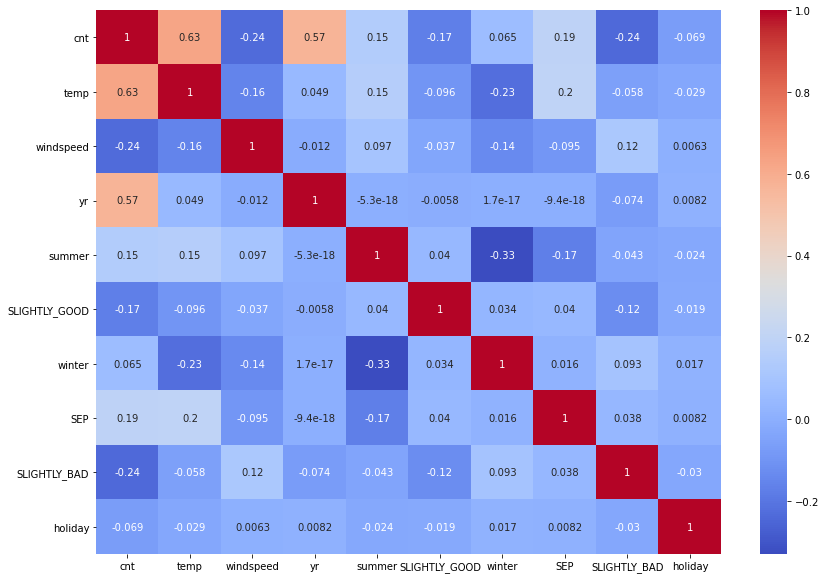

In [128]:
plt.figure(figsize=[14,10])
sns.heatmap(df_2[fea_vars].corr(), annot=True, cmap='coolwarm')
plt.show()

- We can now see the correlation among our feature variables from our final model.

# Residual Analysis on the train data

- Let us now check error terms are also normally distributed 
- We will plot histogram of the error terms and see how it looks like

In [129]:
y_train_pred = lr_model.predict(X_train_sm)

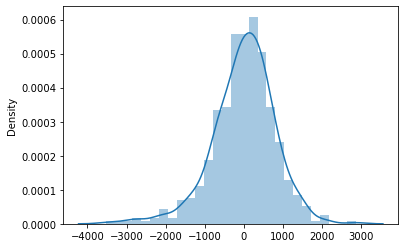

In [130]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

# Prediction and Evaluation on the Test Set

In [131]:
# create a list of numeric variable

num_vars = ['temp','atemp','hum','windspeed']

# Fit on the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,1,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,4968,1,0,...,0,0,0,0,0,0,0,1,0,0


In [132]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,4560.559091,0.263636,0.245455,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,1904.968544,0.441609,0.431338,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,3312.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,4582.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,5913.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
y_test = df_test.pop('cnt')
X_test = df_test

In [134]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,0,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,1,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,0,...,0,0,0,0,0,0,1,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [135]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [136]:
# add a constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,fall,...,NOV,DEC,MON,TUE,WED,THU,FRI,SAT,SLIGHTLY_GOOD,SLIGHTLY_BAD
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,1,...,0,0,0,0,1,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,1,0,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,0,0,0,0,0,1,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,1,...,0,0,0,0,0,0,1,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,1,0,...,0,0,0,0,0,0,0,1,0,0


In [137]:
X_test_sm = X_test_sm.drop(['TUE','atemp','NOV','JUL','MON','DEC','SAT','FEB','WED','APR','JUN','MAY','fall','MAR','FRI','THU','workingday','OCT','AUG','hum'], axis=1)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,summer,winter,SEP,SLIGHTLY_GOOD,SLIGHTLY_BAD
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [138]:
# predict

y_test_pred =  lr_model.predict(X_test_sm)

### R-Squared

In [139]:
# Evaluate

# Calculate R2_Score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.7941977535477243

### Caluculate Adj.R2_Score

- Formulae :- 
- Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]
- Where, 
        - n is number of rows in X
        - Number of features (predictors, k) is the shape along axis 1

In [140]:
r2 = 0.7941977535477243

In [141]:
X_test_sm.shape

(220, 10)

In [142]:
n = X_test_sm.shape[0]

In [143]:
k = X_test_sm.shape[1]

In [144]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [145]:
adjusted_r2

0.7843507561098164

- From Train set R-Squared is 0.830 and Adj.R-Squared is 0.827 and which is very close to our Test set i.e, R-Squared is 0.794 and Adj.R-Squared is 0.784 

In [146]:
r2_score(y_test,y_test_pred)

0.7941977535477243

In [147]:
# Calculate Mean Squared Error value(MSE):

mean_squared_error(y_test,y_test_pred)

743442.1195165364

In [148]:
# Calculate Root Mean Squared Error value(RMSE):

np.sqrt(mean_squared_error(y_test,y_test_pred))

862.2308968695893

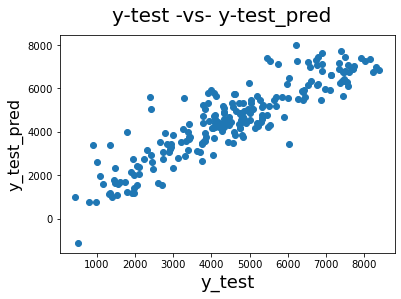

In [149]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y-test -vs- y-test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16)   
plt.show()

_We can see that the equation of our best fitted line is:_

- cnt = 2024.0255 x yr + 4763.282 x temp + 765.5945 x summer + 1124.2676 x winter + 879.5865 x SEP - 857.7734 x holiday - -1332.0158 x windspeed - 681.2314 x SLIGHTLY_GOOD - 2458.7004 x SLIGHTLY_BAD

- Overall we have a decent model, but we also acknowledge that we could do better. 

## INSIGHTS:

### The R-Squared of the Train set is   :  0.830
### The R-Squared of the Test set is    :  0.794

### The Adj.R-Squared of the Train set is :  0.827
### The Adj.R-Squared of the Test set is :   0.784

#### The R-Squared and Adjusted R-Squared values of the Train and the Test set seems to look decent for the Model.


### --- Let us now talk about the predictor variables from our final model that what is it's influence with the above mentioned Business Objective.---

_->  The Coefficient of the 'yr' is 2024.0255 in our final model and which simply denotes that as year increased the demand of the shared bikes has increased by 2024.0255 units._

_->  Our model proves that one of our general assumption is true. As we had assumed that $Temperature$ is one of the very important dependant variable in the mentioned business model. We can see that the coefficient of the 'temp' is 4763.282. It explains that a unit increase in the 'temp' variable, also increases the bike sharing by 4763.282 units._

_->  Summer season has a positive dependency in our regression model. The coefficient of 'summer' variable is 765.5945. Which indicates that a unit increase in 'summer' variable, increases the bike sharing by 765.5945 units._

_->  Even winter is also having positive impact in the liner model. But when compared to summer season winter has more impact than summer. The coefficient of the winter variable from our final model is 1124.2676 and it is indicating that a unit increase in winter 'variable' will lead in increase of bike sharing by 1124.2676 units._

_->  As we had infered earlier in our study that 'fall' season which arrives in the month during 'September' every year had a higher number of users count. And our final model has evidently approved it. The coefficient of the variable'SEP' is 879.5865 and which indicates that increase a unit in 'SEP' variable will result in increase in bike sharing by 879.5865 units._

- Now let us talk about few variables which has negative impact in our Business Objective and let us discuss why.

_->  The coefficient of variable 'holiday' is -857.7734. Well, it is obvious because users normally don't use bike sharing facility as they do it on other days. To say technically a unit increase in the variable 'holiday' will lead in decrease of bike sharing by -857.7734 units._

_->  Windspeed is also impacting bike sharing business negatively. The coefficient of the variable 'windspeed' is -1332.0158. Which indicates a unit increase in 'windspeed' will decrease the bike sharing by -1332.0158 units._

_->  Well, our model says that only good weather conditions lead to good bike sharing business. This is just an assumption. Let us see what our model says about it. The coefficient of the 'SLIGHTLY_GOOD' variable (weathersit:- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist) is -681.2314 and the coefficient of the variable 'SLIGHTLY_BAD' (weathersit :- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) is -2458.7004 and an increase in unit in 'SLIGHTLY_GOOD' and 'SLIGHTLY_BAD' will decrease the bike sharing by -681.2314 units and -2458.7004 units respectively. Though there is much difference between these two variables. Weather condition with slightly bad has much negative impact than weather condition slightly good._


                                               *******************